<a href="https://colab.research.google.com/github/YKochura/ai-lab/blob/main/linear-regression/linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Лінійна регресія** &mdash; статистичний регресійний метод, який застосовують для моделювання взаємозв'язку між скалярною залежною змінною $\hat{y}$ та однією або кількома незалежними змінними $\boldsymbol X$. 

Наприклад, ми можемо за допомогою лінійної регресії передбачати значення неперервної залежної змінної: температуру повітря, ціну акацій, тощо, використовуючи додаткову інформацію, яка характеризує задачу і представлена  в незалежній змінній $\boldsymbol X$. Ця додаткова інформація представляє собою набір вхідних ознак за якими буде здійснюватись моделювання.
 

# Модель лінійної регресії

![](https://docs.google.com/uc?export=download&id=1FAY4ZeGCJ1n14d14LtivoYDsz-LhgUpH)

Метод лінійної регресії полягає у знаходженні лінійної комбінації вхідних ознак (зважена сума) з урахуванням зміщення.

$$\hat y = z = \sum_{i=1}^n w_i x_i  + b$$




Для вирішення задачі

**Дано:**

- Навчальний набір: $\{(\boldsymbol{X}^{(1)}, y^{(1)}), (\boldsymbol{X}^{(2)}, y^{(2)}),..., (\boldsymbol{X}^{(n)}, y^{(n)})\}$

  - де $\boldsymbol{X}^{(i)}$ &mdash;  $i$-й навчальний приклад. Є $m$-вимірним вектором-стовпцем $\boldsymbol{X}^{(i)} = (x^{(i)}_1, x^{(i)}_2, ..., x^{(i)}_m)$
  - $n$ &mdash; загальна кількість навчальних прикладів
  - $y^{(i)}$ &mdash; дійсне цільове значення $i$-го навчального прикладу , $y^{(i)} \in \mathbb{R}$

Модель лінійної регресії: 

- має вектор-рядок дійсних значень ваг $\boldsymbol{W} = \begin{bmatrix}
w_1 & w_2 & \cdots & w_m
\end{bmatrix}$
- має дійсне значення зміщення $b$


# Навчання

Ми можемо навчити модель, використовуючи градієнтний спуск. Фактично, **градієнтний спуск** або будь-який інший алгоритм оптимізації дозволяє знайти глобальний мінімум цільової функції, якщо підбрано оптимальну швидкість навчання та виконано достатню кількість ітерацій навчання. 

Навчання лінійної регресії має різні етапи. На початку (крок 0) ініціалізуються параметри моделі. Інші кроки повторюються протягом певної кількості епох (навчальних ітерацій). 

**Крок 0:** Ініціалізувати ваги та зсув (наприклад, випадковими значеннями з нормального розподілу)

**Крок 1:** Обчислити лінійну комбінацію вхідних ознак та ваг і додати зсув.  Це можна зробити за один крок для всіх навчальних прикладів, використовуючи [векторизацію (vectorization)](https://www.geeksforgeeks.org/vectorization-in-python/) та  [трансляцію (broadcasting)](https://www.geeksforgeeks.org/python-broadcasting-with-numpy-arrays/)

$$z = W \cdot X + b$$

де $\cdot$ скалярний добуток (поелементний добуток), $W$ &mdash;  вектор-рядок ваг з формою $(1, m)$, $X$ &mdash; матриця форми $(m, n)$.


**Крок 2:** Обчислити усереднену втрату на всьому навчальному наборі даних. Функцію, яка визначає усереднені втрати на всьому навчальному наборі даних, часто називають цільовою функцією або імпіричним ризиком. Основна задача оптимізаційного алгоритму &mdash;  мінімізувати у процесі навчання цільову функцію на стільки, на скільки це можливо, не втрачаючи при цьому здатності моделі узагальнювати на нових даних. Для лінійної регресії будемо розраховувати середнє квадратичне відхилення:

$$\mathcal{J}(\hat y,y)  = \frac{1}{n} \sum_{i=1}^n \Big(\hat{y}^{(i)} -  y^{(i)} \Big)^2$$

**Крок 3:** Розрахувати градієнти цільвої функції відносно ваг та зсуву:

$$\boxed{\begin{aligned}
\frac{\partial \mathcal{J}(\hat y, y)}{\partial \hat y} &= \frac{2}{n} \sum_{i=1}^n \Big(\hat{y}^{(i)} -  y^{(i)} \Big) x^{(i)}   \\[12pt]
\frac{\partial \mathcal{J}(\hat y, y)}{\partial b} &=  \frac{2}{n} \sum_{i=1}^n \Big(\hat{y}^{(i)} -  y^{(i)} \Big)
\end{aligned}}$$

**Крок 4:** Оновити ваги та зсув моделі:

$$\boxed{\begin{aligned}
W &= W - \alpha \frac{\partial \mathcal{L}(\hat y, y)}{\partial W} \\[12pt]
b &= b - \alpha \frac{\partial \mathcal{L}(\hat y, y)}{\partial b}
\end{aligned}}$$

де $\alpha$ &mdash; швидкість навчання (крок навчання).

# Імпортупвання бібліотек

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

np.random.seed(123)

## Датасет

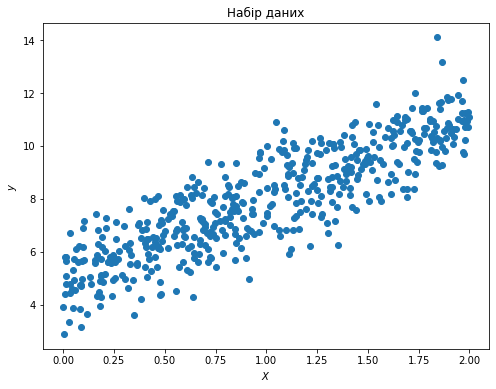

In [2]:
# We will use a simple training set
X = 2 * np.random.rand(500, 1)
y = 5 + 3 * X + np.random.randn(500, 1)

fig = plt.figure(figsize=(8,6))
plt.scatter(X, y)
plt.title("Набір даних")
plt.xlabel("$X$")
plt.ylabel("$y$")
plt.show()

## Поділ набору даних

In [3]:
# Split the data into a training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y)

print(f'Shape X_train: {X_train.shape}')
print(f'Shape y_train: {y_train.shape}')
print(f'Shape X_test: {X_test.shape}')
print(f'Shape y_test: {y_test.shape}')

Shape X_train: (375, 1)
Shape y_train: (375, 1)
Shape X_test: (125, 1)
Shape y_test: (125, 1)


In [4]:
n_samples, m_features = X_train.shape

In [5]:
n_samples

375

In [6]:
m_features

1

## Змінюємо форму $X$ та $y$ обох вибірок
$X = \text{X_train}$, 𝑋 — матриця форми (𝑚, 𝑛).

In [7]:
X_train = X_train.reshape((m_features, n_samples))

In [8]:
X_train.shape

(1, 375)

In [9]:
X_test = X_test.reshape((X_test.shape[1], X_test.shape[0]))

In [10]:
X_test.shape

(1, 125)

In [11]:
y_train = y_train.reshape((m_features,n_samples))

In [12]:
y_train.shape

(1, 375)

In [13]:
y_test = y_test.reshape((y_test.shape[1], y_test.shape[0]))

In [14]:
y_test.shape

(1, 125)

### Крок 0: Ініціалізувати ваги та зсув

In [15]:
# TODO
def parameters_inititalization(m):
  """
  Ця функція ініціалізує вектор-рядок випадкових дійсних значень ваг форми (1, m),
  отриманих з нормального розподілу та зсув (довільне дійсне значення)

  Параметри:
  m -- кількість вхідних ознак для кожного навчального прикладу 

  Повертає:
  W -- вектор-рядок ваг форми (1, m)
  b -- зсув (скаляр)
  """

  # BEGIN_YOUR_CODE   
  raise Exception("Not implemented yet")
  # END_YOUR_CODE

In [16]:
W, b = parameters_inititalization(m_features)

In [17]:
W

array([[0.]])

In [18]:
W.shape

(1, 1)

In [19]:
b

0



### Крок 1: Обчислити лінійну комбінацію вхідних ознак та ваг, включаючи зсув



In [1]:
# TODO
def forwardPropagate(X, W, b):
  """
  Ця функція обчислює лінійну комбінацію вхідних ознак та ваг, включаючи зсув

  Параметри:
  X -- вхідний вектор ознак форми (1, 375) 
  W -- вектор-рядок ваг форми (1, m)
  b -- зсув моделі (скаляр)

  Повертає:
  z -- загальна зважена сума вхідних ознак, включаючи зсув
  y_hat -- прогноз моделі
  """
  
  # BEGIN_YOUR_CODE 
  raise Exception("Not implemented yet")
  # END_YOUR_CODE

In [21]:
z, y_hat = forwardPropagate(X_train, W, b)

In [22]:
z

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 

In [23]:
y_hat.shape

(1, 375)

### Крок 2: Обчислити усереднену втрату на всьому навчальному наборі даних. Цільова функція



In [24]:
# TODO
def cost(n, y_hat, y_true):
  """
  Ця функція обчислює середнє квадратичне відхилення на всьому навчальному наборі даних

  Параметри:
  n -- загальна кількість навчальних прикладів 
  y_hat -- вихідне значення лінійної регресії
  y_true -- істинне значення залежної змінної

  Повертає:
  J --  середнє квадратичне відхилення на всьому навчальному наборі даних
  """

  # BEGIN_YOUR_CODE 
  raise Exception("Not implemented yet")
  # END_YOUR_CODE

In [25]:
J = cost(n_samples, y_hat, y_train)
J

66.45256981003433

### Крок 3: Розрахувати градієнти цільвої функції відносно ваг та зсуву

In [26]:
# TODO
def backwardPropagate(n, X, y_hat, y_true):
  """
  Ця функція обчислює градієнти цільвої функції відносно ваг та зсуву

  Параметри:
  n -- загальна кількість навчальних прикладів 
  X -- вхідний вектор ознак форми (1, 375)
  y_hat --  вихідне значення лінійної регресії
  y_true -- істинне значення залежної змінної

  Повертає:
  dW --  градієнт цільової функції відносно ваг моделі
  db -- градієнт цільової функції відносно зсуву моделі
  """

  # BEGIN_YOUR_CODE  
  raise Exception("Not implemented yet")
  # END_YOUR_CODE

In [27]:
dW, db = backwardPropagate(n_samples, X_train, y_hat, y_train)

In [28]:
dW

array([[-17.54481439]])

In [29]:
dW.shape

(1, 1)

In [30]:
db

-15.798772876862287

In [31]:
db.shape

()

### Крок 4: Оновити ваги та зсув

In [32]:
# TODO
def update(alpha, dW, db, W, b):
  """
  Ця функція оновлює навчальні параметри моделі (ваги та зсув ) у напрямку мінімізації цільової функції

  Параметри:
  alpha -- швидкість  навчання (крок навчання)
  dW --  градієнт цільової функції відносно ваг моделі
  db -- градієнт цільової функції відносно зсуву моделі
  W -- вектор-рядок ваг моделі форми (1, m)
  b -- зсув моделі (скаляр)

  Повертає:
  W -- оновлений вектор-рядок ваг моделі форми (1, m)
  b -- оновлений зсув моделі (скаляр)
  """


  # BEGIN_YOUR_CODE  
  raise Exception("Not implemented yet")
  # END_YOUR_CODE

In [33]:
W, b = update(0.0001, dW, db, W, b)

In [34]:
W

array([[0.00175448]])

In [35]:
b

0.0015798772876862287

# Клас лінійної регресії

In [36]:
class LinearRegression:
    
    def __init__(self):
        pass

    def train_model(self, X, y, alpha=0.01, n_iters=100):
        """
        Trains a linear regression model using gradient descent
        """
        # Step 0: Initialize the parameters
        n_features, n_samples = X.shape
        self.W, self.b = parameters_inititalization(n_features)
        costs = []

        for i in range(n_iters):
          
          # Step 1: Compute a linear combination of the input features and weights
          z, y_hat = forwardPropagate(X_train, self.W, self.b)

          # Step 2: Compute cost over training set
          J = cost(n_samples, y_hat, y_train)
          costs.append(J)

          if i % 20 == 0:
            print(f"Усереднена втрата моделі на ітерації {i}: {J}")

          # Step 3: Compute the gradients
          dW, db = backwardPropagate(n_samples, X_train, y_hat, y_train) 
            
          # Step 4: Update the parameters
          self.W, self.b = update(alpha, dW, db, self.W, self.b)

        return self.W, self.b, costs

    def predict(self, X):
        return np.dot(self.W, X) + self.b

Усереднена втрата моделі на ітерації 0: 66.45256981003433
Усереднена втрата моделі на ітерації 20: 28.75881484083611
Усереднена втрата моделі на ітерації 40: 12.901884438489418
Усереднена втрата моделі на ітерації 60: 6.223991246110849
Усереднена втрата моделі на ітерації 80: 3.404903739019825
Усереднена втрата моделі на ітерації 100: 2.2084346146095934
Усереднена втрата моделі на ітерації 120: 1.6946510641188781
Усереднена втрата моделі на ітерації 140: 1.4684503542539362
Усереднена втрата моделі на ітерації 160: 1.3637291698923506
Усереднена втрата моделі на ітерації 180: 1.310636979355444
Усереднена втрата моделі на ітерації 200: 1.2797812854182806
Усереднена втрата моделі на ітерації 220: 1.2587764605971372
Усереднена втрата моделі на ітерації 240: 1.2423868920290344
Усереднена втрата моделі на ітерації 260: 1.2283839450818483
Усереднена втрата моделі на ітерації 280: 1.2158045034072278
Усереднена втрата моделі на ітерації 300: 1.2042189195356685
Усереднена втрата моделі на ітераці

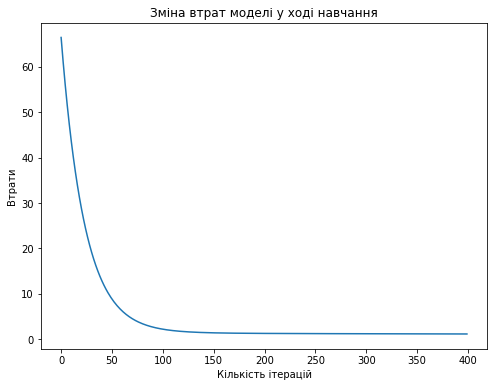

In [37]:
regressor = LinearRegression()
w_trained, b_trained, costs = regressor.train_model(X_train, y_train, alpha=0.005, n_iters=400)

fig = plt.figure(figsize=(8,6))
plt.plot(np.arange(400), costs)
plt.title("Зміна втрат моделі у ході навчання")
plt.xlabel("Кількість ітерацій")
plt.ylabel("Втрати")
plt.show()


# Тестування моделіі

In [38]:
y_hat_test = regressor.predict(X_test)

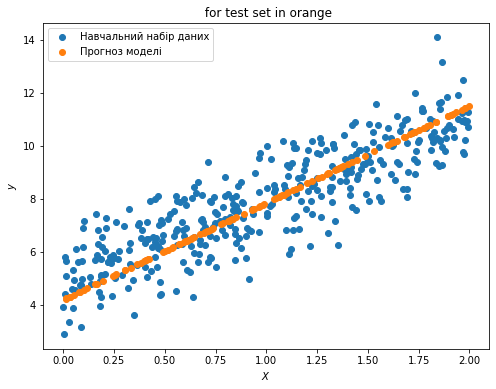

In [39]:
# Plot the test predictions

fig = plt.figure(figsize=(8,6))
plt.title(" for test set in orange")
plt.scatter(X_train, y_train)
plt.scatter(X_test, y_hat_test)
plt.xlabel("$X$")
plt.ylabel("$y$")
plt.legend(["Навчальний набір даних" , "Прогноз моделі"])
plt.show()



Завдання завершено.